# Where does our data come from?

In the companion notebook, we aim to analyze openly available RNA sequencing data .The
data record information about arabinose regulation. We show how to download and process
RNA sequencing data into an analysis ready data frame (i.e. a tabular `.csv` file). We will
sub-select data from the [operon](https://en.wikipedia.org/wiki/Operon) relevant for
arabinose regulation.

![operon](operon.png "operon of araC")


## Capabilities demonstrated in this notebook

* Download openly available RNA sequencing data
* Join data about gene expression with information on experimental treatment
* Curate data coming from a population of interest.


## Download

We start by downloading the gene expression data from the [Many Microbe
Microarrays Database](http://m3d.mssm.edu/).

In [1]:
!wget http://m3d.mssm.edu/norm/E_coli_v4_Build_4_norm.tar.gz

--2019-03-28 19:43:55--  http://m3d.mssm.edu/norm/E_coli_v4_Build_4_norm.tar.gz
Resolving m3d.mssm.edu (m3d.mssm.edu)... 146.203.151.68
Connecting to m3d.mssm.edu (m3d.mssm.edu)|146.203.151.68|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77334790 (74M) [application/x-gzip]
Saving to: ‘E_coli_v4_Build_4_norm.tar.gz.24’

E_coli_v4_Build_4_n 100%[===================>]  73.75M  55.0MB/s    in 1.3s    

2019-03-28 19:43:57 (55.0 MB/s) - ‘E_coli_v4_Build_4_norm.tar.gz.24’ saved [77334790/77334790]



We extract the downloaded `.tar.gz` file.

In [2]:
!tar xvzf E_coli_v4_Build_4_norm.tar.gz

E_coli_v4_Build_4/
E_coli_v4_Build_4/E_coli_v4_Build_4_chips612probes7417.tab
E_coli_v4_Build_4/avg_E_coli_v4_Build_4_exps305probes7110.tab
E_coli_v4_Build_4/E_coli_v4_Build_4.experiment_descriptions
E_coli_v4_Build_4/avg_E_coli_v4_Build_4_exps305probes4217.tab
E_coli_v4_Build_4/E_coli_v4_Build_4.experiment_feature_descriptions
E_coli_v4_Build_4/E_coli_v4_Build_4_chips612probes4217.tab
E_coli_v4_Build_4/E_coli_v4_Build_4_chips612probes7110.tab
E_coli_v4_Build_4/E_coli_v4_Build_4.probe_set_descriptions
E_coli_v4_Build_4/avg_E_coli_v4_Build_4_exps305probes7417.tab


We import [pandas](https://pandas.pydata.org/) to handle tabular data structures
in python as well as [seaborn](https://seaborn.pydata.org/) to visualize the
the final data product.

In [3]:
import numpy as np
import pandas as pd; pd.options.mode.chained_assignment = None  # We suppress a warning pointing at a broken piece of the pandas library.
import seaborn as sns

%matplotlib inline

Next, we load the expression values. Pandas refers to data tables as dataframes.
As per convention, we abbreviate dataframe with df. We further add the suffix
transposed, because in this table, genes are rows and columns are individual
measuremnts of those (which is the transpose of what is assumed in BayesDB and
most other machine learning tools).

In [4]:
df_transposed = pd.read_csv('E_coli_v4_Build_4//avg_E_coli_v4_Build_4_exps305probes4217.tab', sep='\t')

We chose a simpler name for the column that describes the genes and make it an
index in the pandas dataframe. This is important for the transposition. We then transpose the dataframe.
Finally, we remove a code-suffix from the gene names and print the first 5 rows of the new dataframe.

In [5]:
df_transposed.rename(columns={'E_coli_v4_Build_4:genes':'genes'}, inplace=True)
df_transposed.set_index('genes', inplace=True)
df = df_transposed.T
# Remove suffix from gene names.
df.rename(columns={c: c.split('_')[0] for c in df.columns}, inplace=True)
df.index.name = 'experiment_id' # We rename the index.
df.head() # Shows the first 5 rows in a dataframe.

genes,aaeA,aaeB,aaeR,aaeX,aas,aat,abgA,abgB,abgR,abgT,...,zntR,znuA,znuB,znuC,zraP,zraR,zraS,zupT,zur,zwf
experiment_id,,,,,,,,,,,,,,,,,,,,,
dinI_U_N0025,7.079730,7.160177,7.850877,6.808163,9.105384,9.007313,7.978220,7.261173,7.091983,6.331840,...,8.457910,9.133237,8.537863,7.319317,7.429750,8.810774,7.652740,8.471070,8.860310,10.025960
dinP_U_N0025,7.140113,7.326037,7.929670,6.872810,9.149680,8.856897,8.035783,7.385193,7.223700,6.415070,...,8.508150,9.042843,8.483343,7.446053,7.496840,8.918127,7.767050,8.483680,8.979750,10.079533
lexA_U_N0025,7.008617,7.253773,7.803493,6.793687,9.154460,8.938447,8.068630,7.461243,7.281440,6.552440,...,8.543767,9.315153,8.570760,7.489433,7.523753,8.909290,7.838573,8.469897,8.905100,10.068734
lon_U_N0025,7.073240,7.144593,7.905110,6.886763,9.197417,8.950143,7.974673,7.216376,7.080210,6.519123,...,8.567167,9.317673,8.513873,7.532827,7.428913,8.830104,7.684587,8.504740,8.893967,9.974360
luc_U_N0025,7.148680,7.291903,7.802933,6.757710,9.124220,8.960897,8.095693,7.350433,7.339867,6.503300,...,8.486357,9.168493,8.451530,7.330467,7.545867,8.956520,7.901007,8.395527,8.872267,10.046300


Next, we load the experimental configuration for each data table. The naming
conventions by the data owners is not ideal. For example, the column `feature_name`
describes  an experimental treatment.

In [6]:
df_treatment = pd.read_csv('E_coli_v4_Build_4/E_coli_v4_Build_4.experiment_feature_descriptions', sep='\t')
df_treatment.set_index(['experiment_name', 'feature_name'], inplace=True)
df_treatment.head() # Shows the first 5 rows in a dataframe.

value feature_units feature_type  \
experiment_name feature_name                                                  
dinI_U_N0025    aeration         assumed_aerobic           NaN         list   
                Ampicillin                0.1431            mM         real   
                arabinose                 8.3261            mM         real   
                cell_density                 0.3         OD600         real   
                culture_shaking              300           RPM         real   

                                                             feature_url  
experiment_name feature_name                                              
dinI_U_N0025    aeration                                             NaN  
                Ampicillin       http://en.wikipedia.org/wiki/Ampicillin  
                arabinose         http://en.wikipedia.org/wiki/Arabinose  
                cell_density                                         NaN  
                culture_shaking                                      NaN

Now, we 're defining genes and experimental treatments of interest. We are
interested mainly in `araC` in the next notebook. For the demo, we thus choose genes from the
same [operon](https://ecocyc.org/gene?orgid=ECOLI&id=EG10054#tab=TU) as `araC` and [experimental variables that effect `araC`](https://ecocyc.org/gene?orgid=ECOLI&id=EG10054).

In [7]:
genes = ['araC', 'araB', 'araA', 'araD']
exp_vars = ['arabinose', 'glucose']

In [8]:
df_genes_of_interest = df[genes]
df_genes_of_interest.head()

genes,araC,araB,araA,araD
experiment_id,,,,
dinI_U_N0025,8.789793,13.260900,13.228167,12.101567
dinP_U_N0025,8.845097,13.257600,13.297267,12.171334
lexA_U_N0025,9.337717,13.426900,13.398266,12.312567
lon_U_N0025,8.891520,13.219534,13.311500,12.187900
luc_U_N0025,9.246210,13.345467,13.288033,12.176267


Let's get information on the experimental configuration we are interested
in. Was an organism treated with `arabinose` or `glucose`? If so, what was the
volume? 

We first generate a function that for a given `experiment_name` (i.e a row-id) looks up
whether a treatment was administered. If so, it returns the amount that was
administered. If the treatment, was not administered. It returns 0.

In [9]:
def get_value(experiment_name, treatment):
    """For a given experiment get the treatment value."""
    if experiment_name in df_treatment.index:
        if treatment in df_treatment.loc[experiment_name].index:
            return float(df_treatment.loc[experiment_name].loc[treatment]['value'])
    return 0.

We use the function to get treatment values for `glucose` and `arabinose`. 

In [10]:
arabinose_treatment = [get_value(name, 'arabinose') for name in df_genes_of_interest.index]
glucose_treatment   = [get_value(name, 'glucose') for name in df_genes_of_interest.index]

Next, we add noise from a standard normal distribution. We're doing this because BayesDB
currently does not have a way to handle ordinal values, and both treatments were
set taking fewer than 10 values each -- modelling those treatments with BayesDB and
the [CrossCat prior](http://jmlr.org/papers/volume17/11-392/11-392.pdf) could
otherwise create pathologies.

In [11]:
np.random.seed(42) # Setting the rand-seed to ensure we're always producing the same dataset.
df_genes_of_interest['arabinose'] = arabinose_treatment + np.random.normal(0, 1, (len(glucose_treatment)))
df_genes_of_interest['glucose']   = glucose_treatment + np.random.normal(0, 1, (len(glucose_treatment)))

Let's plot the data that we will analyze. 

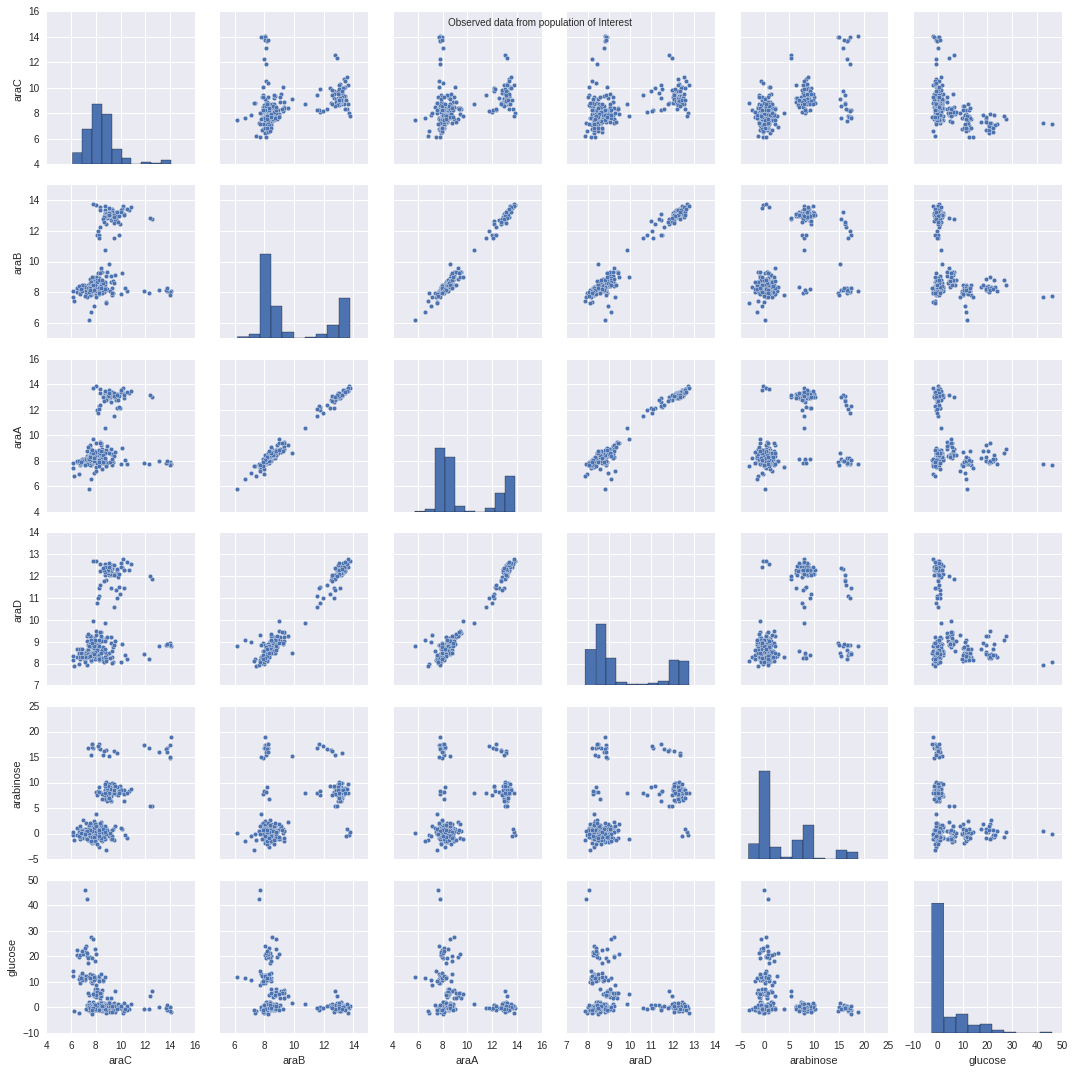

In [12]:
g = sns.pairplot(df_genes_of_interest)
g.fig.suptitle('Observed data from population of Interest');

Finally we save the data to disk. We set `index=False` because if we don't then
pandas will save the index using a column that has an empty string in it's
header; and BayesDB will complain about a missing column header later. 

In [13]:
df_genes_of_interest.to_csv('rna-seq-araD-treatment.csv', index=False)

Now we can test our [hypotheses with BayesDB](hypothesis-testing-with-BayesDB.ipynb).